<a href="https://colab.research.google.com/github/saurav714/Building-a-simple-Generative-Adversarial-Network-GAN-using-TensorFlow/blob/main/Building_a_simple_Generative_Adversarial_Network_(GAN)_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [2]:
# Load MNIST dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize images to [-1, 1]
train_images = train_images.reshape(train_images.shape[0], 28 * 28).astype('float32')
train_images = (train_images - 127.5) / 127.5

# Batch and shuffle the data
BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [3]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(100,), use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(784, use_bias=False, activation='tanh'))
    return model

generator = make_generator_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(512, input_shape=(784,)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

discriminator = make_discriminator_model()

In [5]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [6]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [7]:
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
        print(f'Epoch {epoch + 1}, Gen Loss: {g_loss}, Disc Loss: {d_loss}')
        generate_and_save_images(generator, epoch + 1, seed)

In [8]:
seed = tf.random.normal([16, 100])

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :].numpy().reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.show()

Epoch 1, Gen Loss: 3.1792397499084473, Disc Loss: 0.06647948920726776


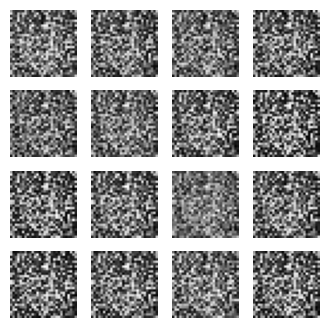

Epoch 2, Gen Loss: 3.7072720527648926, Disc Loss: 0.07534293830394745


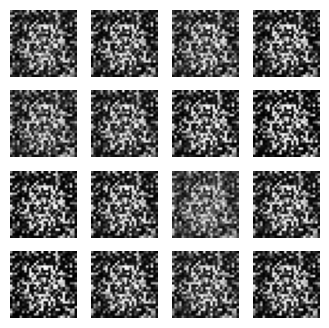

Epoch 3, Gen Loss: 2.8124561309814453, Disc Loss: 0.18966710567474365


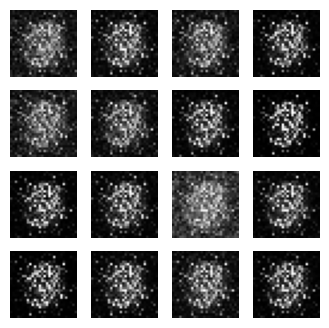

Epoch 4, Gen Loss: 4.578526496887207, Disc Loss: 0.048044778406620026


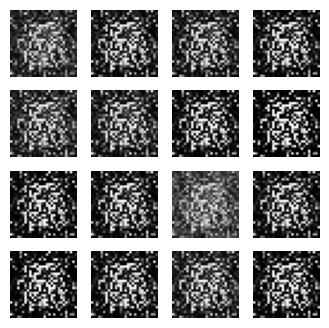

Epoch 5, Gen Loss: 3.4597530364990234, Disc Loss: 0.10464174300432205


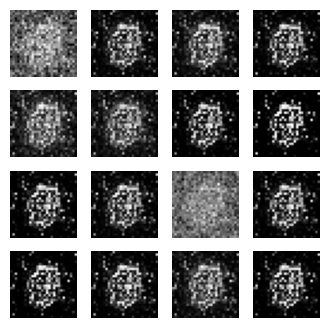

Epoch 6, Gen Loss: 3.0426926612854004, Disc Loss: 0.19836381077766418


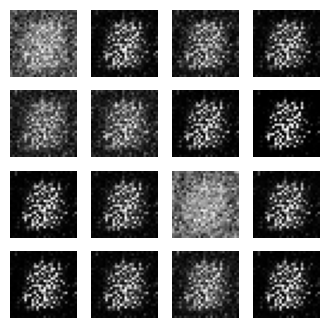

Epoch 7, Gen Loss: 4.401301383972168, Disc Loss: 0.11256732046604156


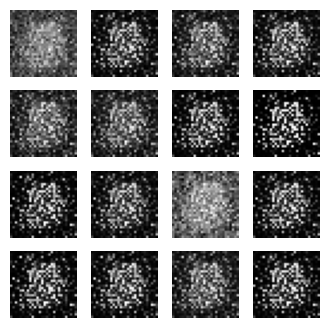

Epoch 8, Gen Loss: 2.598839044570923, Disc Loss: 0.2596249580383301


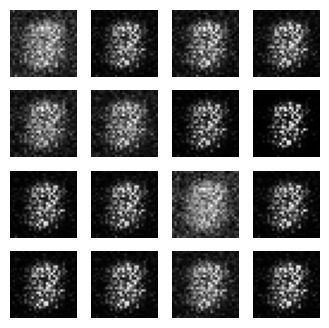

Epoch 9, Gen Loss: 2.821131706237793, Disc Loss: 0.19203808903694153


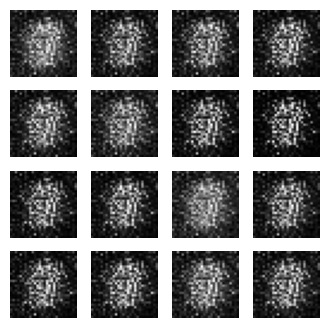

Epoch 10, Gen Loss: 4.452332973480225, Disc Loss: 0.13616102933883667


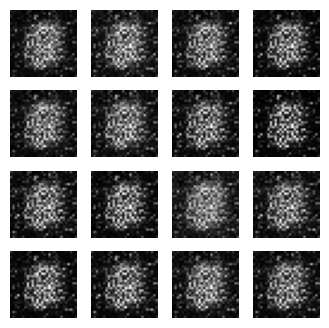

Epoch 11, Gen Loss: 2.8293614387512207, Disc Loss: 0.16582922637462616


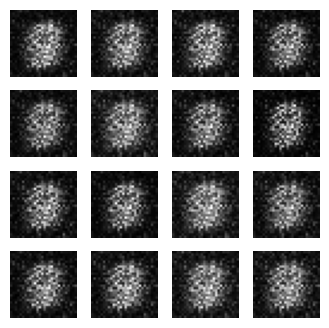

Epoch 12, Gen Loss: 3.570002555847168, Disc Loss: 0.14013497531414032


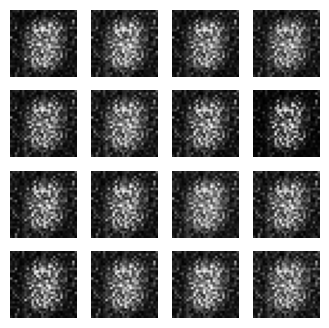

Epoch 13, Gen Loss: 2.6305441856384277, Disc Loss: 0.23792091012001038


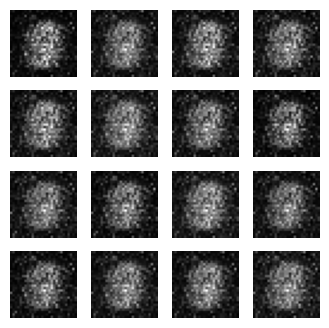

Epoch 14, Gen Loss: 2.9333934783935547, Disc Loss: 0.2058967649936676


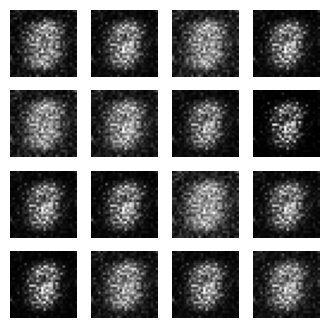

Epoch 15, Gen Loss: 3.489845037460327, Disc Loss: 0.1686769723892212


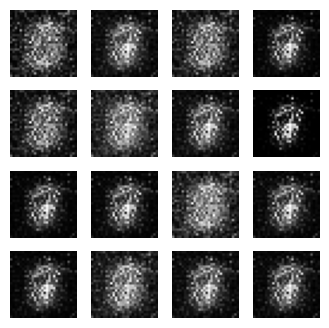

Epoch 16, Gen Loss: 4.128899574279785, Disc Loss: 0.1303240954875946


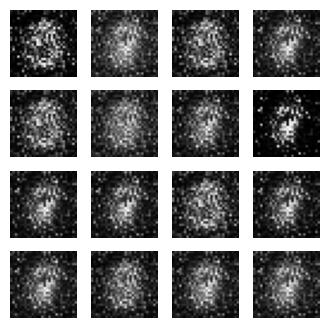

Epoch 17, Gen Loss: 3.736074924468994, Disc Loss: 0.14324155449867249


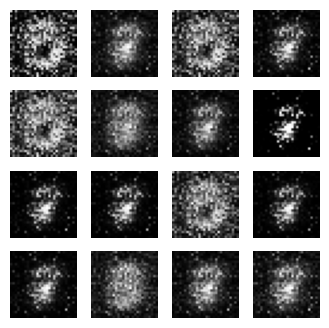

Epoch 18, Gen Loss: 4.659960746765137, Disc Loss: 0.06716963648796082


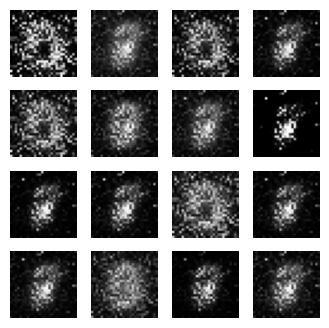

Epoch 19, Gen Loss: 4.3892130851745605, Disc Loss: 0.11319906264543533


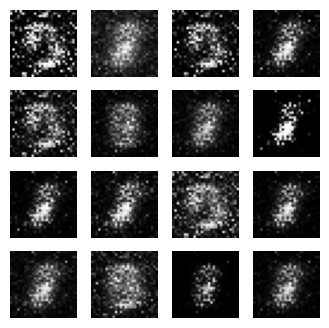

Epoch 20, Gen Loss: 2.4265246391296387, Disc Loss: 0.2048773169517517


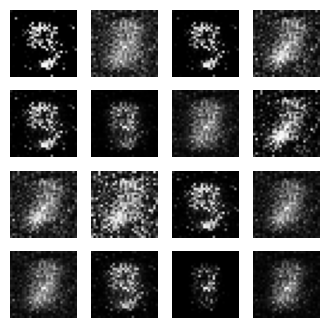

Epoch 21, Gen Loss: 3.5376811027526855, Disc Loss: 0.18742838501930237


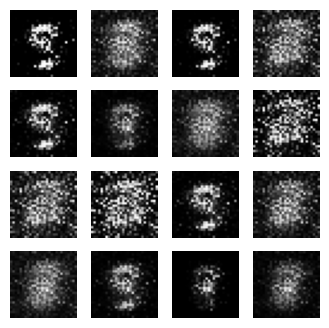

Epoch 22, Gen Loss: 3.584132432937622, Disc Loss: 0.08593178540468216


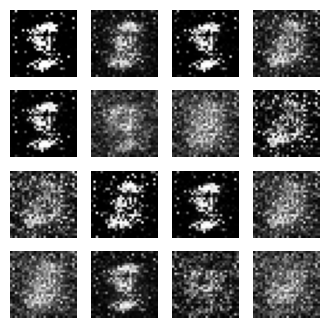

Epoch 23, Gen Loss: 4.658476829528809, Disc Loss: 0.15748624503612518


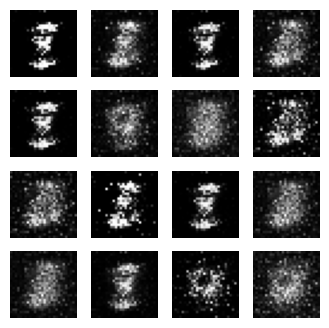

Epoch 24, Gen Loss: 3.5812346935272217, Disc Loss: 0.2471407949924469


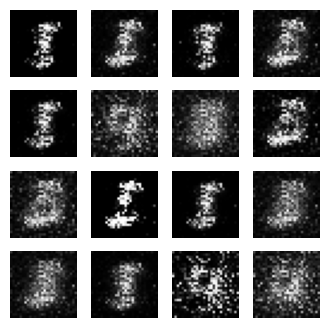

Epoch 25, Gen Loss: 2.987250328063965, Disc Loss: 0.15138156712055206


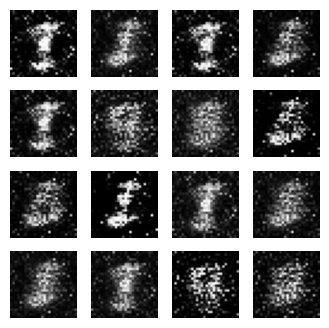

Epoch 26, Gen Loss: 3.79056453704834, Disc Loss: 0.1090756431221962


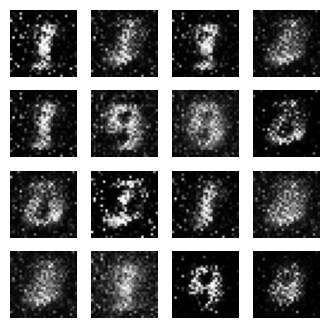

Epoch 27, Gen Loss: 3.0747647285461426, Disc Loss: 0.1678861379623413


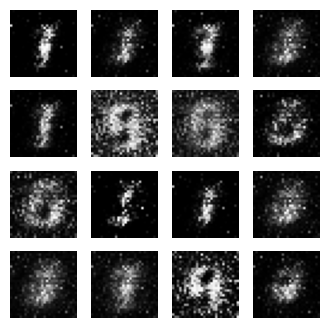

Epoch 28, Gen Loss: 3.9238147735595703, Disc Loss: 0.19778558611869812


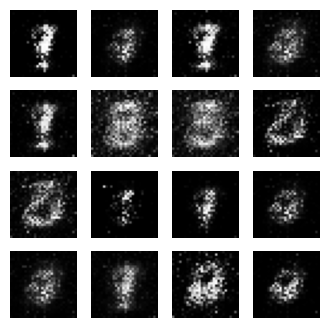

Epoch 29, Gen Loss: 4.4507341384887695, Disc Loss: 0.25782209634780884


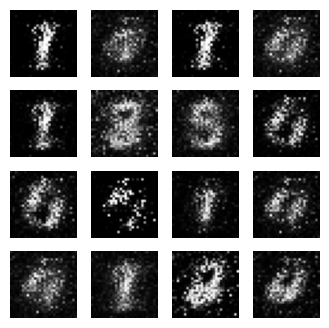

Epoch 30, Gen Loss: 4.610942840576172, Disc Loss: 0.1527547836303711


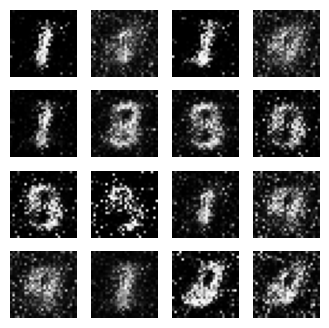

Epoch 31, Gen Loss: 3.912970542907715, Disc Loss: 0.1389555037021637


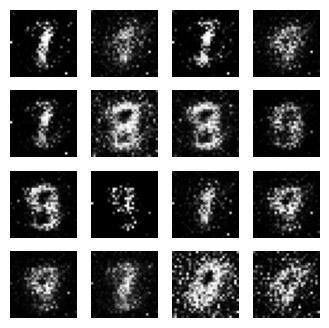

Epoch 32, Gen Loss: 3.421492099761963, Disc Loss: 0.18674859404563904


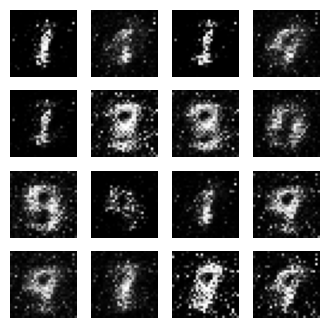

Epoch 33, Gen Loss: 4.455008506774902, Disc Loss: 0.3456226885318756


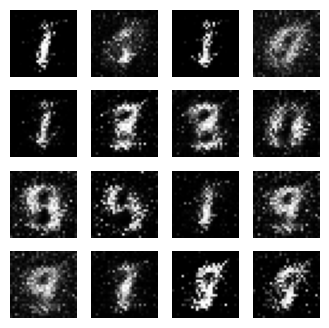

Epoch 34, Gen Loss: 3.4499354362487793, Disc Loss: 0.14516477286815643


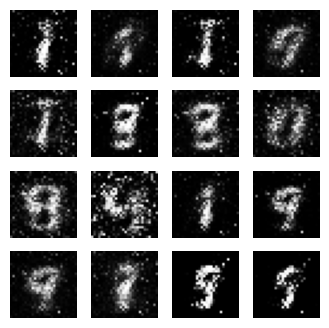

Epoch 35, Gen Loss: 4.304237365722656, Disc Loss: 0.2624499201774597


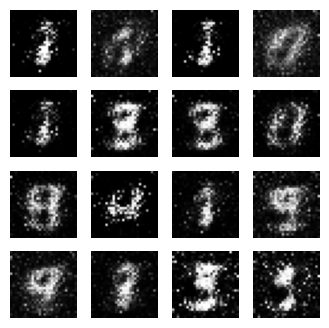

Epoch 36, Gen Loss: 3.200594902038574, Disc Loss: 0.16798953711986542


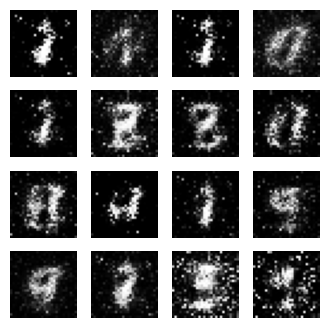

Epoch 37, Gen Loss: 4.23633337020874, Disc Loss: 0.1447121500968933


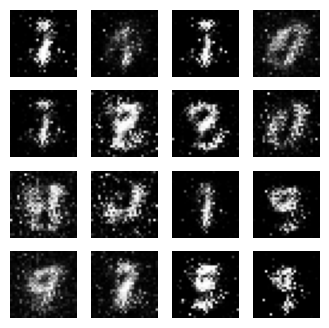

Epoch 38, Gen Loss: 4.598242282867432, Disc Loss: 0.2255362570285797


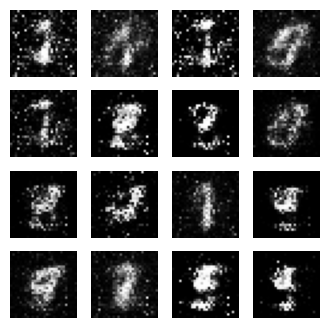

Epoch 39, Gen Loss: 4.788075923919678, Disc Loss: 0.1105039119720459


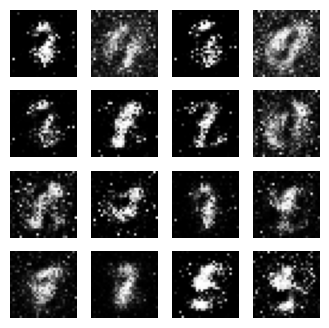

Epoch 40, Gen Loss: 3.4185469150543213, Disc Loss: 0.1404128223657608


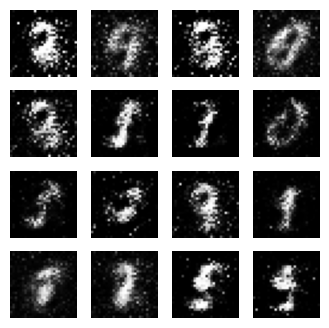

Epoch 41, Gen Loss: 4.265214920043945, Disc Loss: 0.20083175599575043


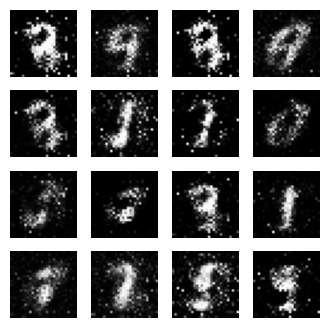

Epoch 42, Gen Loss: 5.222251892089844, Disc Loss: 0.24176733195781708


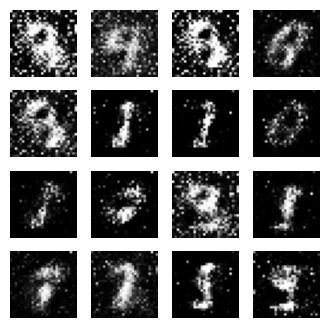

Epoch 43, Gen Loss: 3.8888602256774902, Disc Loss: 0.22676941752433777


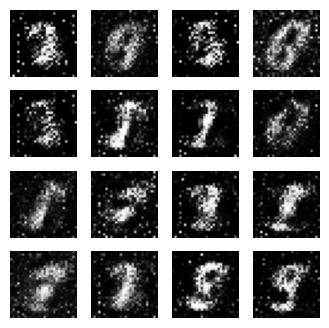

Epoch 44, Gen Loss: 5.028362274169922, Disc Loss: 0.1419309824705124


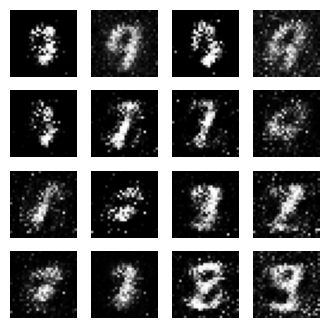

Epoch 45, Gen Loss: 4.327912330627441, Disc Loss: 0.27221357822418213


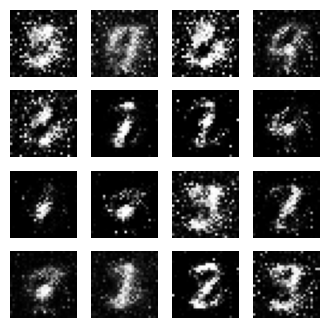

Epoch 46, Gen Loss: 3.4633612632751465, Disc Loss: 0.2269255816936493


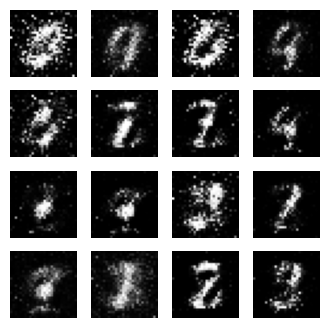

Epoch 47, Gen Loss: 3.908872604370117, Disc Loss: 0.1865503489971161


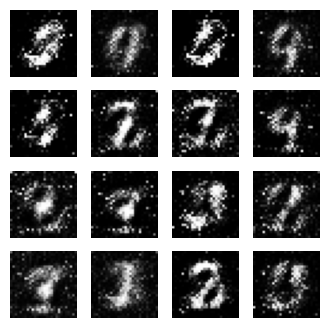

Epoch 48, Gen Loss: 4.060515880584717, Disc Loss: 0.27864715456962585


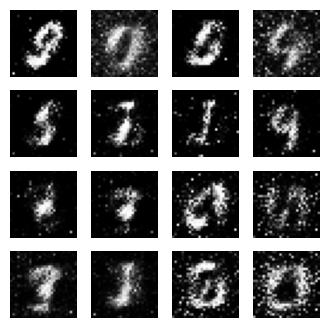

Epoch 49, Gen Loss: 4.635575294494629, Disc Loss: 0.37716206908226013


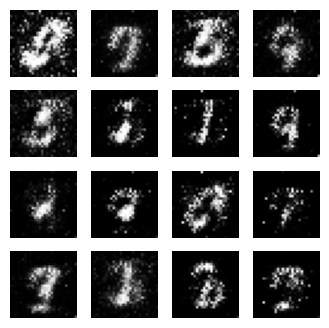

Epoch 50, Gen Loss: 3.4243388175964355, Disc Loss: 0.36010774970054626


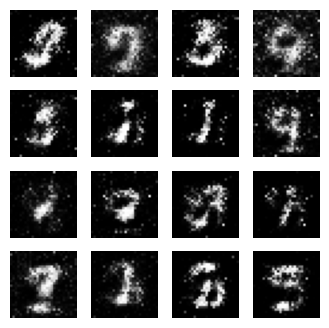

In [9]:
EPOCHS = 50
train(train_dataset, EPOCHS)